In [1]:
import sys
sys.path.append('/home/xhding/workspaces/torch-deep-retina')
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from  torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from fnn.evaluation import *
from fnn.models import BNCNN_3D2_Stack_Old
from fnn.utils import select_model
from fnn.config import get_custom_cfg
from fnn.data import TestDataset
from fnn.notebook.utils import *
from torchdeepretina.utils import *
from torchdeepretina.intracellular import *
from torchdeepretina.visualizations import plot_filters
from torchdeepretina.datas import loadexpt

In [2]:
device = torch.device('cuda:1')

In [6]:
cfg = get_custom_cfg('3d_conv2_stack')
model = BNCNN_3D2_Stack_Old().to(device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack/epoch_016_loss_-3.59_pearson_0.5458_eval_loss_-1.87.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.1
bipolar.1.convs
bipolar.1.convs.0
bipolar.1.convs.1
bipolar.1.convs.2
bipolar.1.convs.3
bipolar.1.convs.4
bipolar.1.convs.5
bipolar.1.convs.6
bipolar.2
bipolar.3
bipolar.4
bipolar.5
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.1
ganglion.2
ganglion.3
ganglion.4
ganglion.5


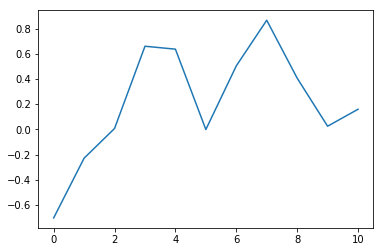

In [3]:
filter_w = checkpoint['model_state_dict']['ganglion.1.filter'].cpu().numpy().squeeze()
plt.plot(np.arange(filter_w.shape[0]), filter_w)

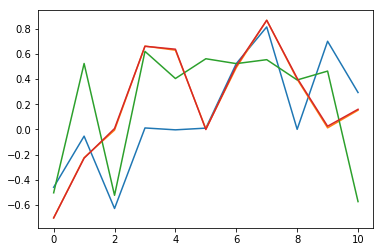

In [4]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack', 'ganglion.1.filter')

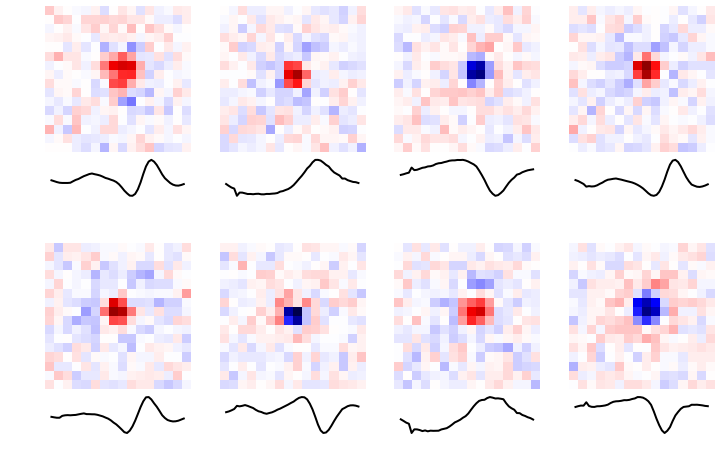

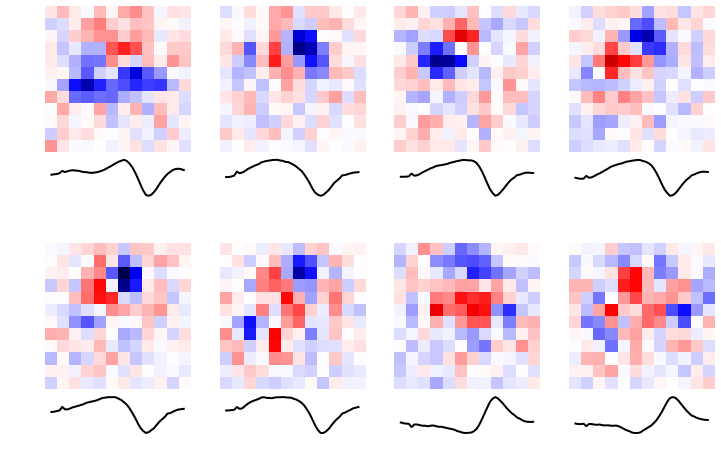

In [7]:
layers = ['bipolar.1', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans, device)
fig = plot_filters(np.stack(stas['bipolar.1']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

In [4]:
test_data =  DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
test_pc

0.7346976413925875

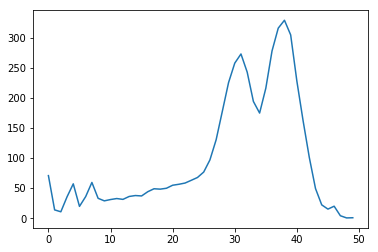

In [5]:
#noise = np.random.randn(1000,50,50)
#filter_size = model.image_shape[0]
#X = tdrstim.concat(noise, nh=filter_size)
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'test',
                        cfg.img_shape[0], 0, data_path=cfg.Data.data_path)
X = data.X[0:1000]
intg_grad = stimulus_importance(model, X, alpha_steps=5, batch_size=500,
                    to_numpy=True, verbose=False)
plt.plot(np.arange(50), np.sqrt(np.square(intg_grad).mean(axis=(0,2,3))))

In [8]:
cfg = get_custom_cfg('bn_cnn_stack')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack/epoch_010_loss_-3.77_pearson_0.5576_eval_loss_-2.03.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.0.convs
bipolar.0.convs.0
bipolar.0.convs.1
bipolar.0.convs.2
bipolar.0.convs.3
bipolar.0.convs.4
bipolar.0.convs.5
bipolar.0.convs.6
bipolar.1
bipolar.2
bipolar.3
bipolar.4
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.1
ganglion.2


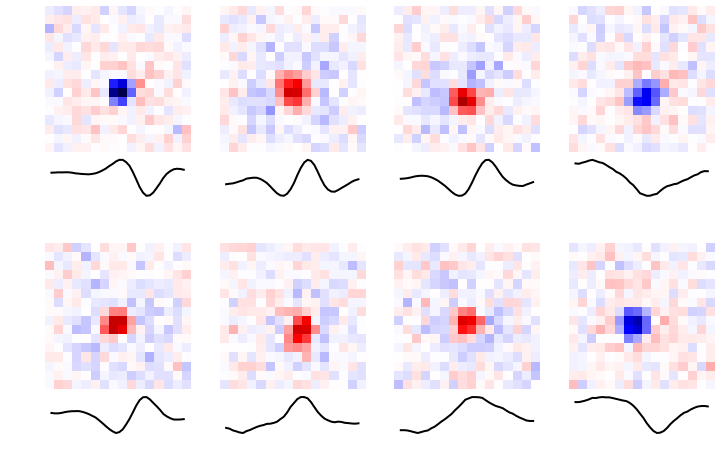

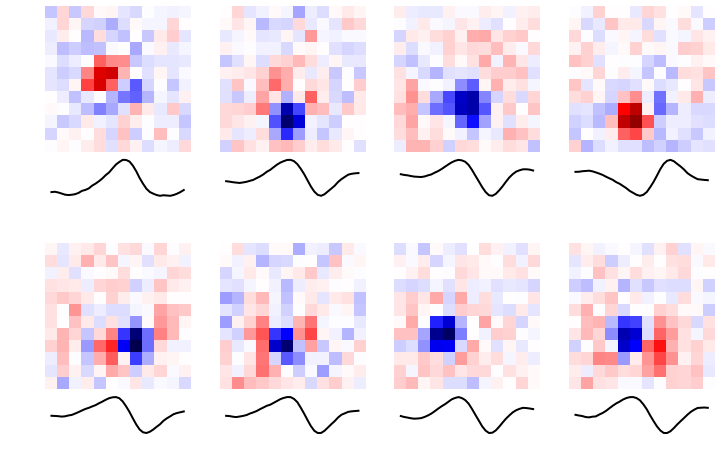

In [9]:
layers = ['bipolar.0', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans)
fig = plot_filters(np.stack(stas['bipolar.0']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

In [10]:
test_data =  DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
test_pc

0.7121205056407338

In [6]:
cfg = get_custom_cfg('3d_conv2_stack_double_filter')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack_double_filter/epoch_023_loss_-4.27_pearson_0.5408_eval_loss_-1.85.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.1
bipolar.1.convs
bipolar.1.convs.0
bipolar.1.convs.1
bipolar.1.convs.2
bipolar.1.convs.3
bipolar.1.convs.4
bipolar.1.convs.5
bipolar.1.convs.6
bipolar.2
bipolar.3
bipolar.4
bipolar.5
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.0.filter1
ganglion.0.filter1.sequential
ganglion.0.filter1.sequential.0
ganglion.0.filter1.sequential.1
ganglion.0.filter1.sequential.2
ganglion.0.filter1.sequential.3
ganglion.0.filter2
ganglion.0.filter2.sequential
ganglion.0.filter2.sequential.0
ganglion.0.filter2.sequential.1
ganglion.0.filter2.sequential.2
ganglion.0.filter2.sequential.3
ganglion.1
ganglion.2


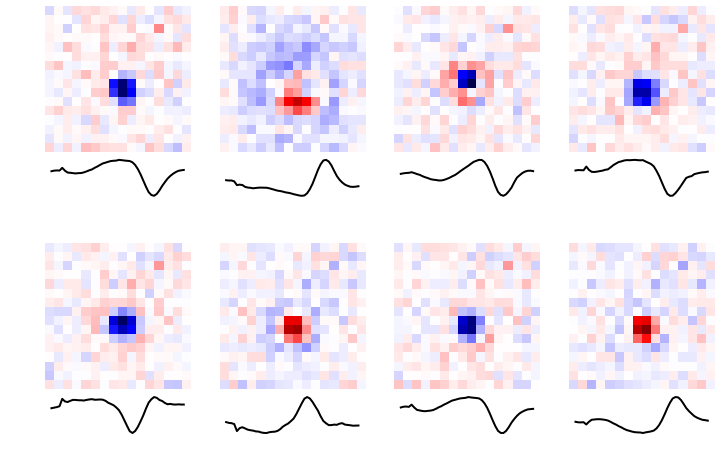

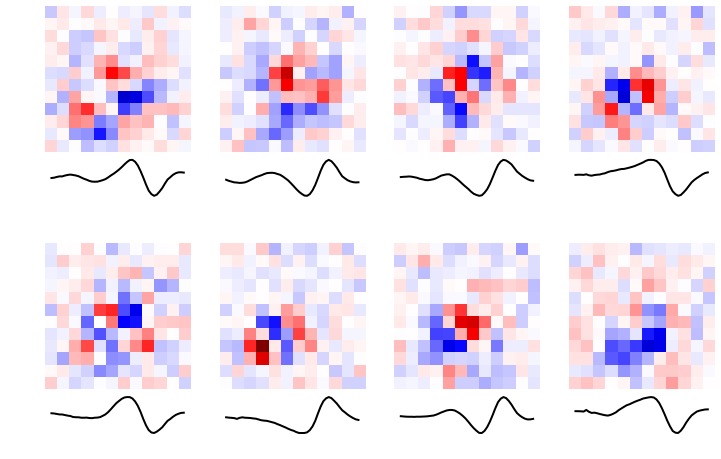

In [4]:
layers = ['bipolar.1', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans, device)
fig = plot_filters(np.stack(stas['bipolar.1']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

In [5]:
test_data =  DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
test_pc

0.7478203685237761

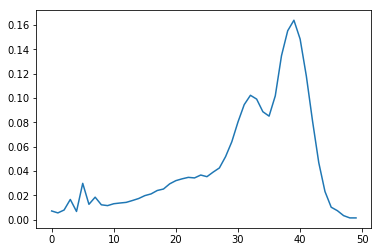

In [4]:
#noise = np.random.randn(1000,50,50)
#filter_size = model.image_shape[0]
#X = tdrstim.concat(noise, nh=filter_size)
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'test',
                        cfg.img_shape[0], 0, data_path=cfg.Data.data_path)
X = data.X[0:1000]
intg_grad = stimulus_importance(model, X, alpha_steps=5, batch_size=500,
                    to_numpy=True, verbose=False, device=device)
plt.plot(np.arange(50), np.sqrt(np.square(intg_grad).mean(axis=(0,2,3))))

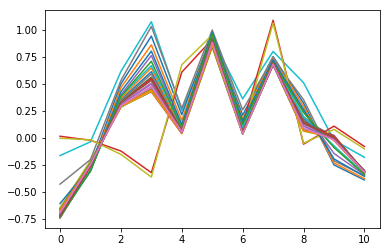

In [9]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_double_filter', 'ganglion.0.filter1.sequential.1.filter')

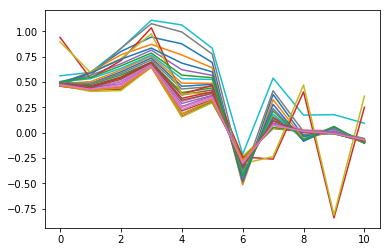

In [10]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_double_filter', 'ganglion.0.filter2.sequential.1.filter')

In [11]:
cfg = get_custom_cfg('3d_conv2_stack_triple_filter')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack_triple_filter/epoch_019_loss_-4.20_pearson_0.5454_eval_loss_-1.82.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.1
bipolar.1.convs
bipolar.1.convs.0
bipolar.1.convs.1
bipolar.1.convs.2
bipolar.1.convs.3
bipolar.1.convs.4
bipolar.1.convs.5
bipolar.1.convs.6
bipolar.2
bipolar.3
bipolar.4
bipolar.5
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.0.filter1
ganglion.0.filter1.sequential
ganglion.0.filter1.sequential.0
ganglion.0.filter1.sequential.1
ganglion.0.filter1.sequential.2
ganglion.0.filter1.sequential.3
ganglion.0.filter2
ganglion.0.filter2.sequential
ganglion.0.filter2.sequential.0
ganglion.0.filter2.sequential.1
ganglion.0.filter2.sequential.2
ganglion.0.filter2.sequential.3
ganglion.0.filter3
ganglion.0.filter3.sequential
ganglion.0.filter3.sequential.0
ganglion.0.filter3.sequential.1
ganglion.0.filter3.sequential.2
ganglion.0.filter3.sequential.3
ganglion.1
ganglion.2


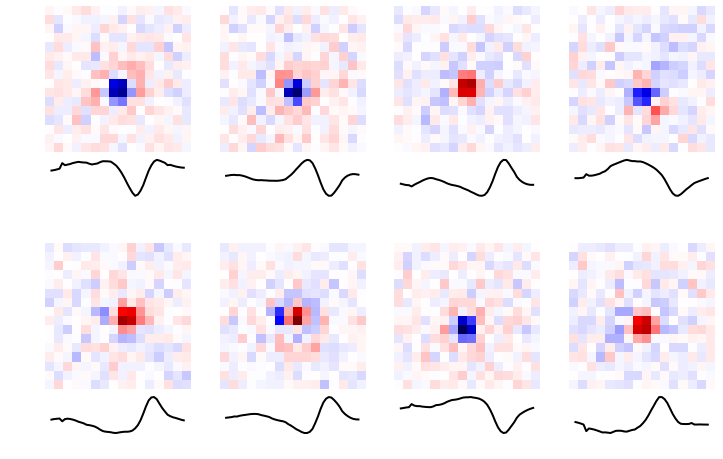

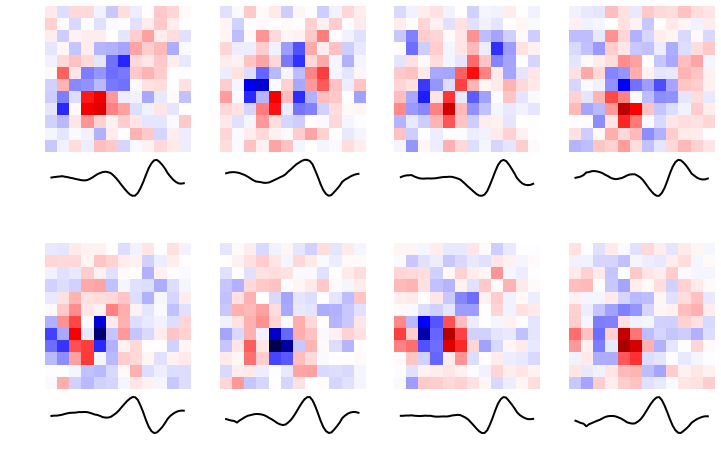

In [6]:
layers = ['bipolar.1', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans, device)
fig = plot_filters(np.stack(stas['bipolar.1']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

In [7]:
test_data =  DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
test_pc

0.7172343075997053

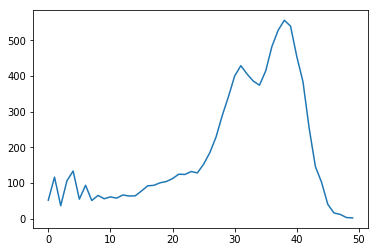

In [8]:
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'test',
                        cfg.img_shape[0], 0, data_path=cfg.Data.data_path)
X = data.X[0:1000]
intg_grad = stimulus_importance(model, X, alpha_steps=5, batch_size=500,
                    to_numpy=True, verbose=False, device=device)
plt.plot(np.arange(50), np.sqrt(np.square(intg_grad).mean(axis=(0,2,3))))

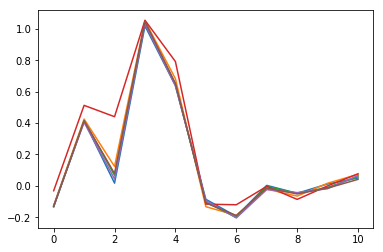

In [12]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_triple_filter', 'ganglion.0.filter1.sequential.1.filter')

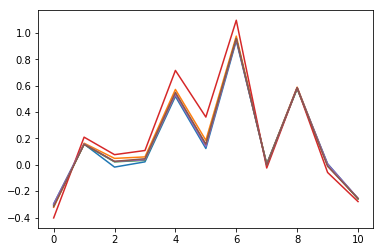

In [13]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_triple_filter', 'ganglion.0.filter2.sequential.1.filter')

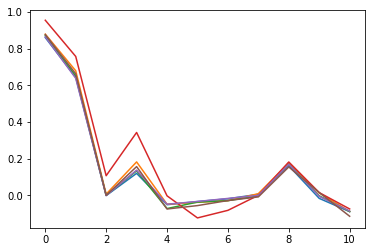

In [14]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_triple_filter', 'ganglion.0.filter3.sequential.1.filter')

In [3]:
cfg = get_custom_cfg('3d_conv2_stack_chan_filter')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack_channel_filter/epoch_010_loss_-3.85_pearson_0.5408_eval_loss_-1.85.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.1
bipolar.1.convs
bipolar.1.convs.0
bipolar.1.convs.1
bipolar.1.convs.2
bipolar.1.convs.3
bipolar.1.convs.4
bipolar.1.convs.5
bipolar.1.convs.6
bipolar.2
bipolar.3
bipolar.4
bipolar.5
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.0.sequential
ganglion.0.sequential.0
ganglion.0.sequential.1
ganglion.0.sequential.2
ganglion.0.sequential.3
ganglion.1
ganglion.2


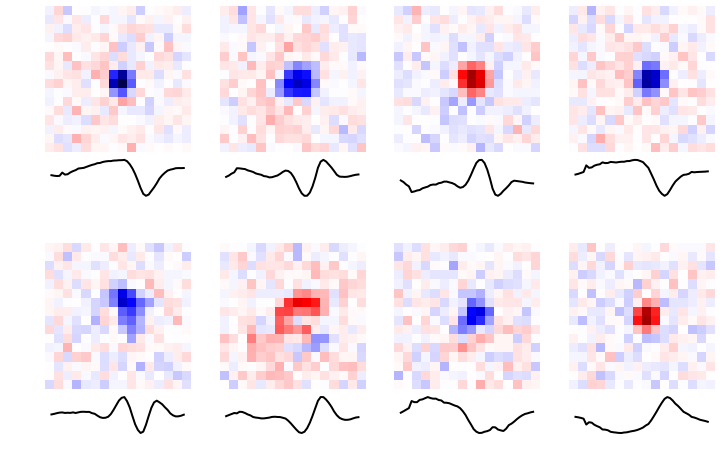

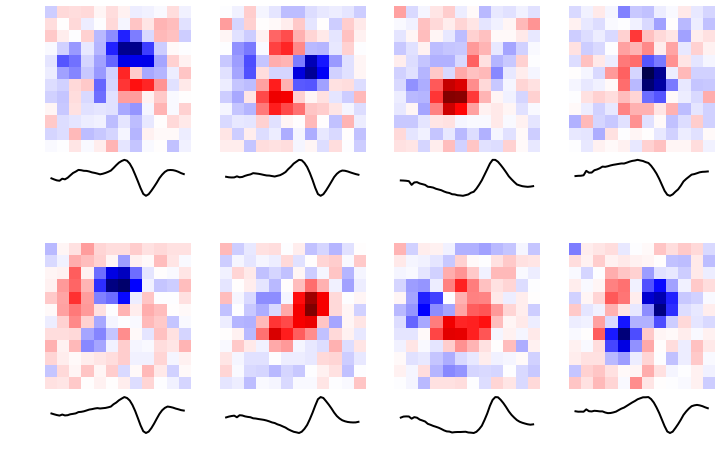

In [4]:
layers = ['bipolar.1', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans, device)
fig = plot_filters(np.stack(stas['bipolar.1']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

In [5]:
test_data =  DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
test_pc

0.757752026915177

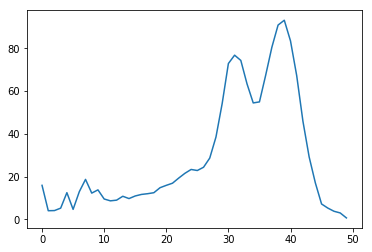

In [6]:
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'test',
                        cfg.img_shape[0], 0, data_path=cfg.Data.data_path)
X = data.X[0:1000]
intg_grad = stimulus_importance(model, X, alpha_steps=5, batch_size=500,
                    to_numpy=True, verbose=False, device=device)
plt.plot(np.arange(50), np.sqrt(np.square(intg_grad).mean(axis=(0,2,3))))